In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [28]:
df.head()
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [29]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

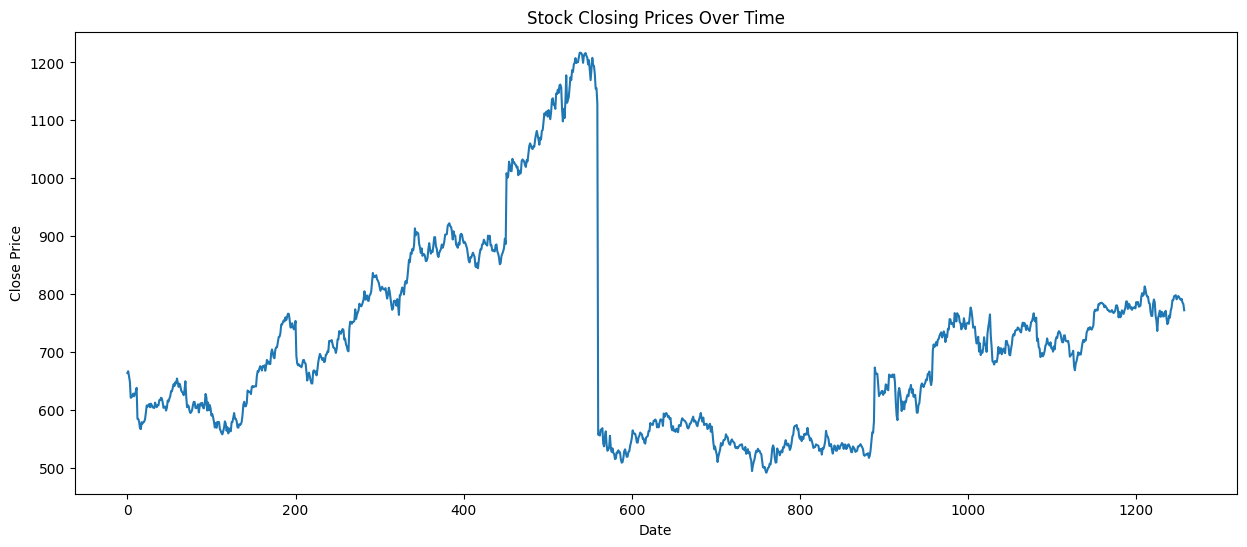

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Remove commas and convert to numeric for the Close column
df['Close'] = df['Close'].str.replace(',', '').astype(float)

# Now, plot the Close column
plt.figure(figsize=(15, 6))
df['Close'].plot()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Prices Over Time")
plt.show()


In [32]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Now, you can access the year attribute
for i in range(2012, 2017):  # Assuming you want to count up to 2016
    print(i, list(df.index.year).count(i))

2012 250
2013 252
2014 252
2015 252
2016 252


In [34]:
df['MA_for_250_days'] = df['Close'].rolling(250).mean()

In [35]:
df['MA_for_250_days'][0:250].tail()

Date
2012-12-24          NaN
2012-12-26          NaN
2012-12-27          NaN
2012-12-28          NaN
2012-12-31    641.05696
Name: MA_for_250_days, dtype: float64

In [36]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

<Figure size 640x480 with 0 Axes>

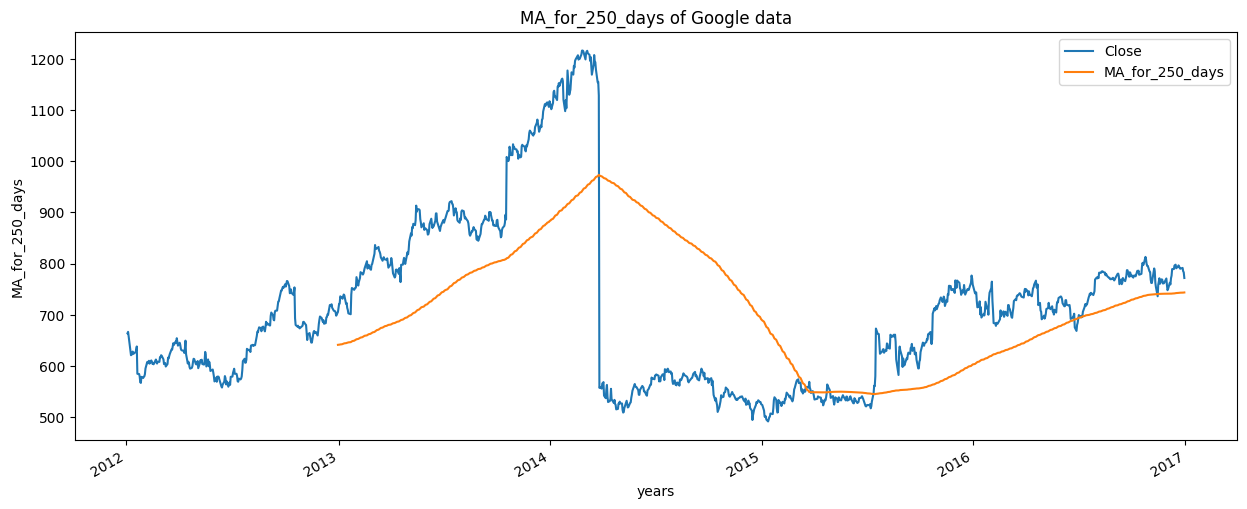

In [37]:
plot_graph((15,6), df[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

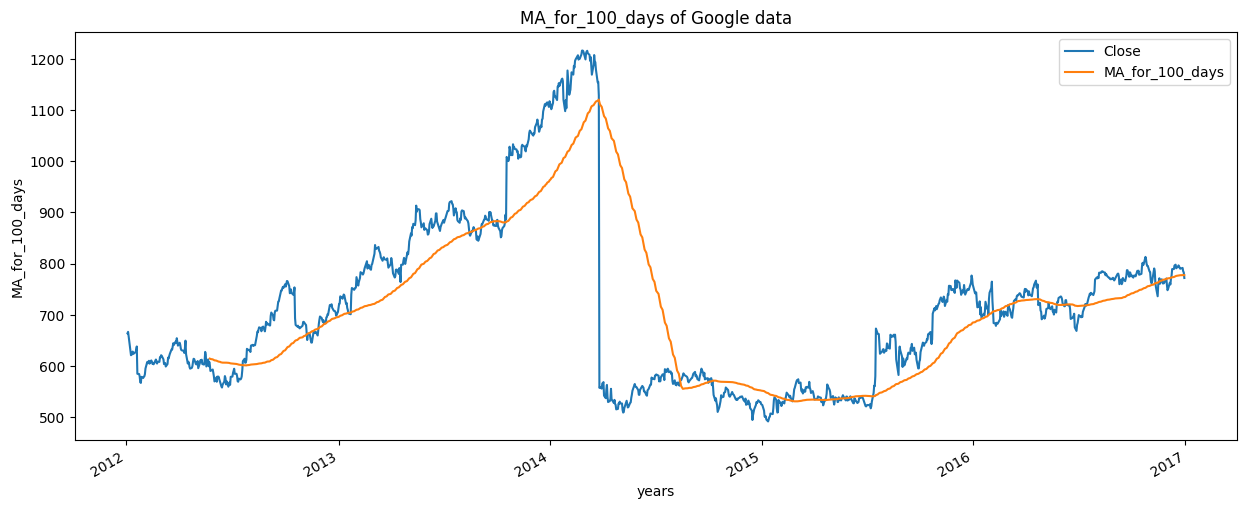

In [42]:
df['MA_for_100_days'] = df['Close'].rolling(100).mean()
plot_graph((15,6), df[['Close','MA_for_100_days']], 'MA_for_100_days')

In [43]:
df['percentage_change_cp'] = df['Close'].pct_change()
df[['Close','percentage_change_cp']].head()

,Close,percentage_change_cp
Date,,
2012-01-03,663.59,NaN
2012-01-04,666.45,0.004310
2012-01-05,657.21,-0.013865
2012-01-06,648.24,-0.013649
2012-01-09,620.76,-0.042392


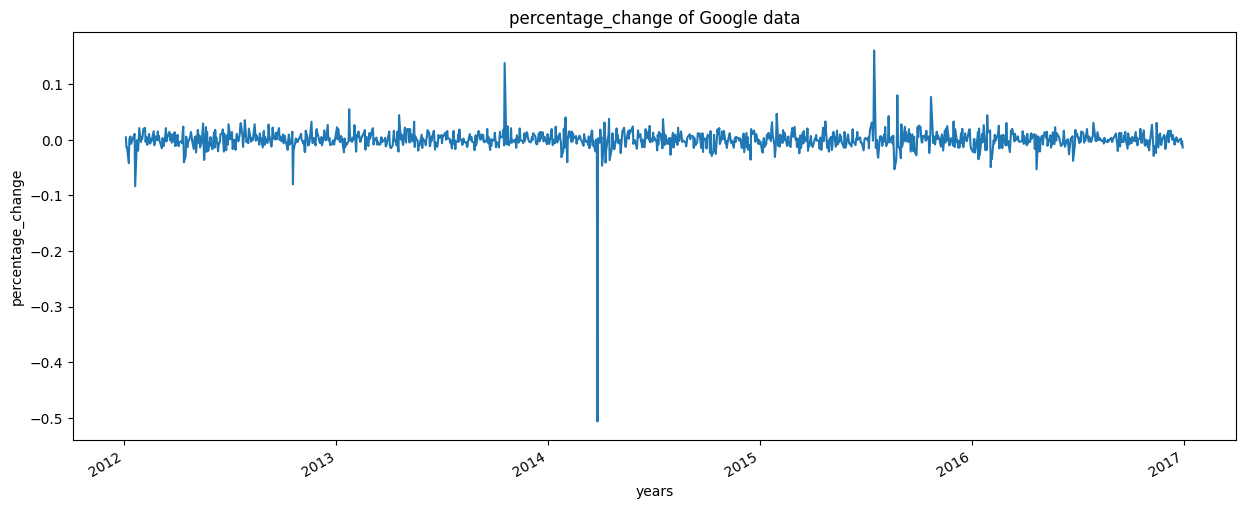

In [44]:
plot_graph((15,6), df['percentage_change_cp'], 'percentage_change')

In [45]:
Close_price = df[['Close']]

In [46]:
max(Close_price.values),min(Close_price.values) 

(array([1216.83]), array([491.2]))

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [48]:
len(scaled_data)

1258

In [49]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [50]:
x_data[0],y_data[0]

(array([[0.23757287],
        [0.24151427],
        [0.22878051],
        [0.21641884],
        [0.1785483 ],
        [0.17947163],
        [0.18335791],
        [0.18841558],
        [0.18202114],
        [0.18695478],
        [0.19290823],
        [0.2020589 ],
        [0.12842633],
        [0.12777862],
        [0.12146686],
        [0.1057426 ],
        [0.10382702],
        [0.12015766],
        [0.11701556],
        [0.12033681],
        [0.12132905],
        [0.12721359],
        [0.14263468],
        [0.16016427],
        [0.15698083],
        [0.16121164],
        [0.1634304 ],
        [0.15579565],
        [0.16443642],
        [0.16108761],
        [0.15531331],
        [0.1566363 ],
        [0.15404545],
        [0.16691702],
        [0.15859322],
        [0.15607128],
        [0.16128054],
        [0.16046746],
        [0.17295316],
        [0.17276022],
        [0.17846561],
        [0.17688078],
        [0.16726155],
        [0.15448645],
        [0.15702217],
        [0

In [51]:

int(len(x_data)*0.7)

810

In [55]:
1300-100-int(len(x_data)*0.7)

390

In [56]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [57]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(810, 100, 1)
(810, 1)
(348, 100, 1)
(348, 1)


In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [59]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\ADARSH UNIYAL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [61]:
model.fit(x_train, y_train, batch_size=1, epochs = 20)

Epoch 1/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0138
Epoch 2/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0021
Epoch 3/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0043
Epoch 4/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0016
Epoch 5/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0013
Epoch 6/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0023
Epoch 7/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 6.2731e-04
Epoch 8/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0017
Epoch 9/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 7.5948e-04
Epoch 10/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 9.0527e-04
Epoch 11/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 6.8520e-04
Epoch 12/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 7.3322e-04
Epoch 13/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0029
Epoch 14/20
810/810 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0038
Epoch 15/

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [63]:
predictions = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [64]:
predictions

array([[0.24226564],
       [0.24784005],
       [0.24056402],
       [0.24773487],
       [0.22675987],
       [0.17639485],
       [0.14325464],
       [0.1327835 ],
       [0.20184436],
       [0.21532428],
       [0.20351334],
       [0.18577719],
       [0.15599552],
       [0.18009084],
       [0.16892304],
       [0.1601147 ],
       [0.1809244 ],
       [0.17833209],
       [0.19059348],
       [0.1973001 ],
       [0.19327705],
       [0.21079592],
       [0.2119965 ],
       [0.22190863],
       [0.20163545],
       [0.21064234],
       [0.19217692],
       [0.19142409],
       [0.19694322],
       [0.17661783],
       [0.15154189],
       [0.15176472],
       [0.17196022],
       [0.17628767],
       [0.19903706],
       [0.22067326],
       [0.22596066],
       [0.22096398],
       [0.21611542],
       [0.22275579],
       [0.22724305],
       [0.23545319],
       [0.23359263],
       [0.24935704],
       [0.24978805],
       [0.2553765 ],
       [0.23165745],
       [0.220

In [65]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[666.9952 ],
       [671.04016],
       [665.7605 ],
       [670.96387],
       [655.7438 ],
       [619.1974 ],
       [595.14984],
       [587.5517 ],
       [637.6643 ],
       [647.44574],
       [638.8754 ],
       [626.0055 ],
       [604.395  ],
       [621.87933],
       [613.77563],
       [607.38403],
       [622.4842 ],
       [620.6031 ],
       [629.50037],
       [634.3669 ],
       [631.44763],
       [644.15985],
       [645.031  ],
       [652.2236 ],
       [637.51276],
       [644.0484 ],
       [630.64935],
       [630.1031 ],
       [634.1079 ],
       [619.3592 ],
       [601.1633 ],
       [601.3251 ],
       [615.9795 ],
       [619.1196 ],
       [635.62726],
       [651.32715],
       [655.1638 ],
       [651.5381 ],
       [648.01984],
       [652.83826],
       [656.09436],
       [662.0519 ],
       [660.7018 ],
       [672.1409 ],
       [672.4537 ],
       [676.50885],
       [659.2976 ],
       [651.15717],
       [661.466  ],
       [716.823  ],


In [66]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[660.87],
       [656.13],
       [660.9 ],
       [646.83],
       [612.48],
       [589.61],
       [582.06],
       [628.62],
       [637.61],
       [630.38],
       [618.25],
       [597.79],
       [614.34],
       [606.25],
       [600.7 ],
       [614.66],
       [612.72],
       [621.35],
       [625.77],
       [623.24],
       [635.14],
       [635.98],
       [642.9 ],
       [629.25],
       [635.44],
       [622.69],
       [622.36],
       [625.8 ],
       [611.97],
       [594.89],
       [594.97],
       [608.42],
       [611.29],
       [626.91],
       [641.47],
       [645.44],
       [642.36],
       [639.16],
       [643.61],
       [646.67],
       [652.3 ],
       [651.16],
       [661.74],
       [662.2 ],
       [666.1 ],
       [650.28],
       [642.61],
       [651.79],
       [702.  ],
       [712.78],
       [708.49],
       [712.95],
       [716.92],
       [710.81],
       [721.11],
       [722.16],
       [728.11],
       [731.25],
       [733.76

In [67]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [68]:
rmse

16.280570944874306

In [70]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = df.index[splitting_len+100:]
)
ploting_data.tail()

,original_test_data,predictions
Date,,
2016-12-23,789.91,805.812073
2016-12-27,791.55,804.569580
2016-12-28,785.05,806.564575
2016-12-29,782.79,799.007019
2016-12-30,771.82,797.063477


<Figure size 640x480 with 0 Axes>

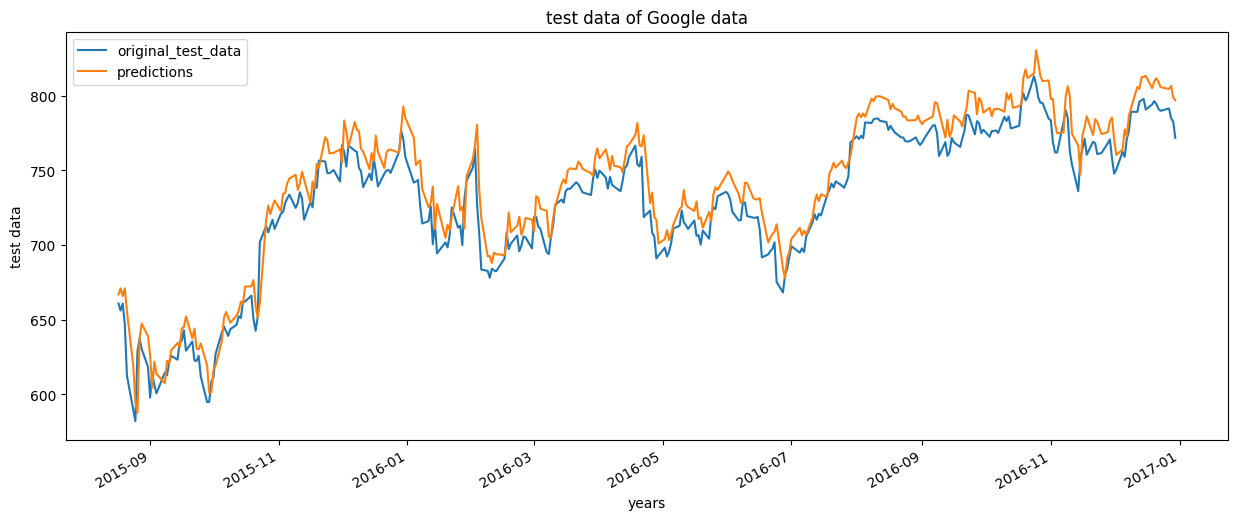

In [71]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

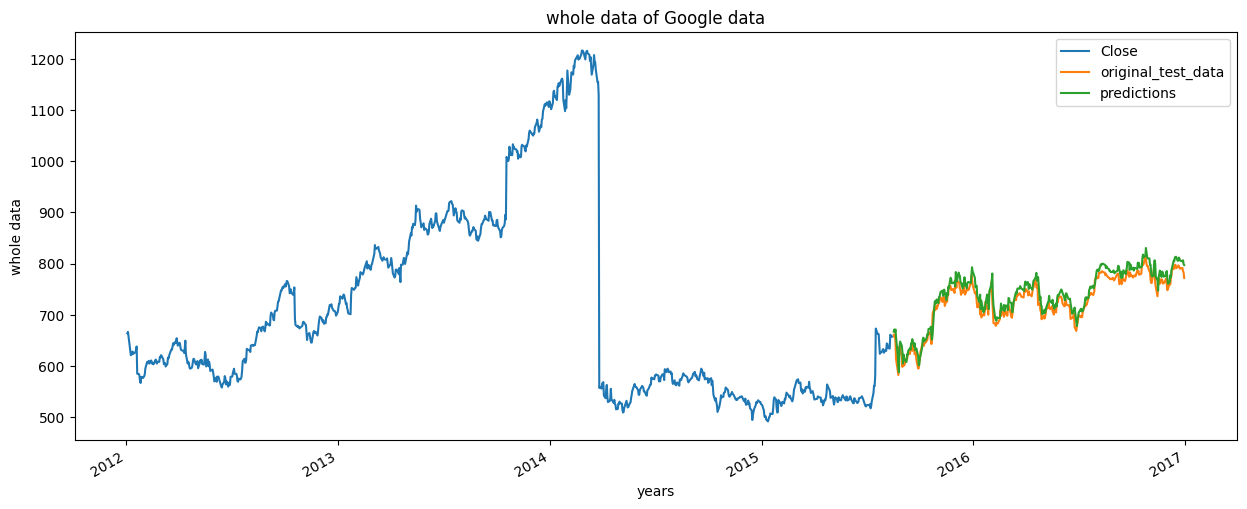

In [72]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [75]:
model.save("Google_Stock_Price.keras")

In [79]:
train_loss, train_mae = model.evaluate(x_train, y_train)
print(f'Training Loss: {train_loss}, Training MAE: {train_mae}')

# For testing data
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Testing Loss: {test_loss}, Testing MAE: {test_mae}')


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.4392e-04 - mae: 0.0177
Training Loss: 0.0012535557616502047, Training MAE: 0.0172242671251297
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2000e-04 - mae: 0.0185
Testing Loss: 0.0005033949855715036, Testing MAE: 0.018864000216126442
